In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [2]:
sales=pd.read_csv("sales.csv")
sales

,Index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
sales=sales.drop(["Index"],axis=1)

In [4]:
sales

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# DATA ANALYSIS

In [5]:
sales.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
sales.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [7]:
sales.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
sales.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [9]:
sales.shape

(200, 4)

In [10]:
sales.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

# DATA CLEANING

In [11]:
sales.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

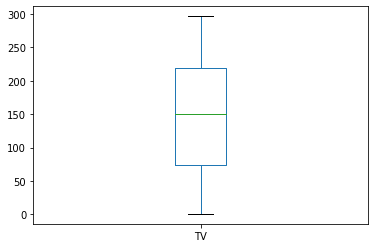

In [12]:
sales['TV'].plot.box()

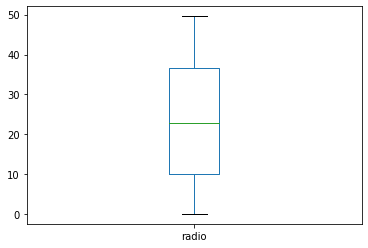

In [13]:
sales['radio'].plot.box()

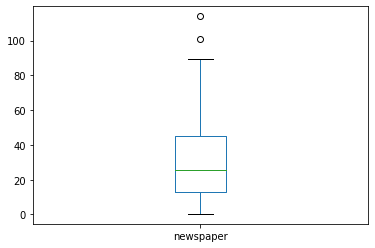

In [14]:
sales['newspaper'].plot.box()

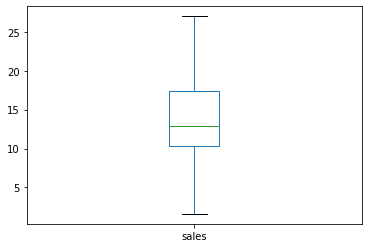

In [15]:
sales['sales'].plot.box()

# EDA PROCESS

In [16]:
import seaborn as sns

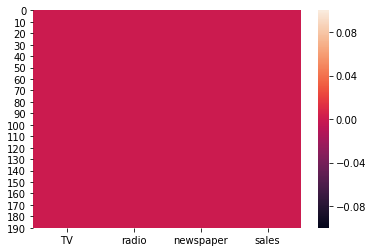

In [17]:
sns.heatmap(sales.isnull())

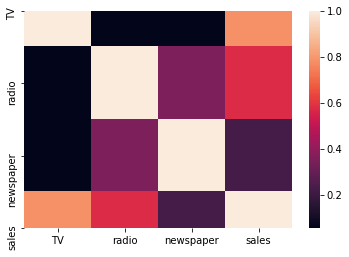

In [18]:
sns.heatmap(sales.corr())

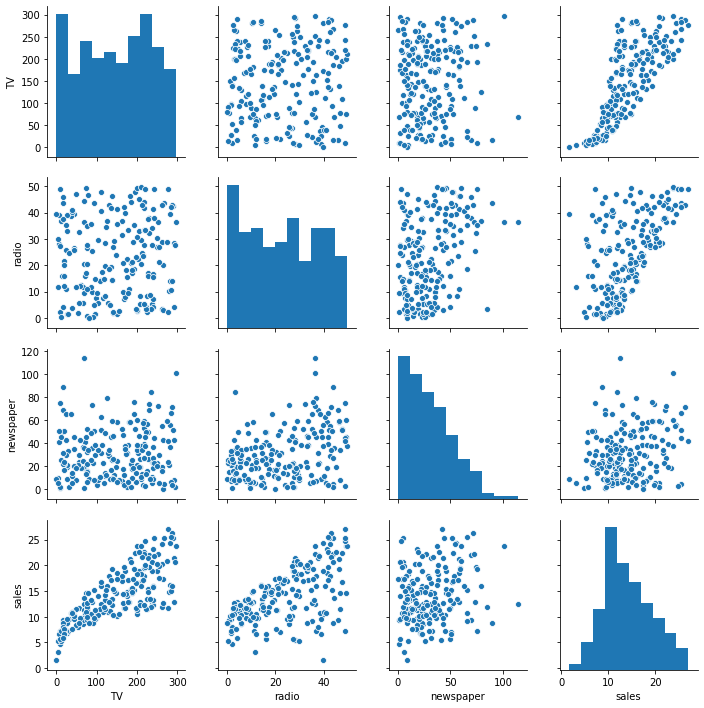

In [19]:
sns.pairplot(sales)

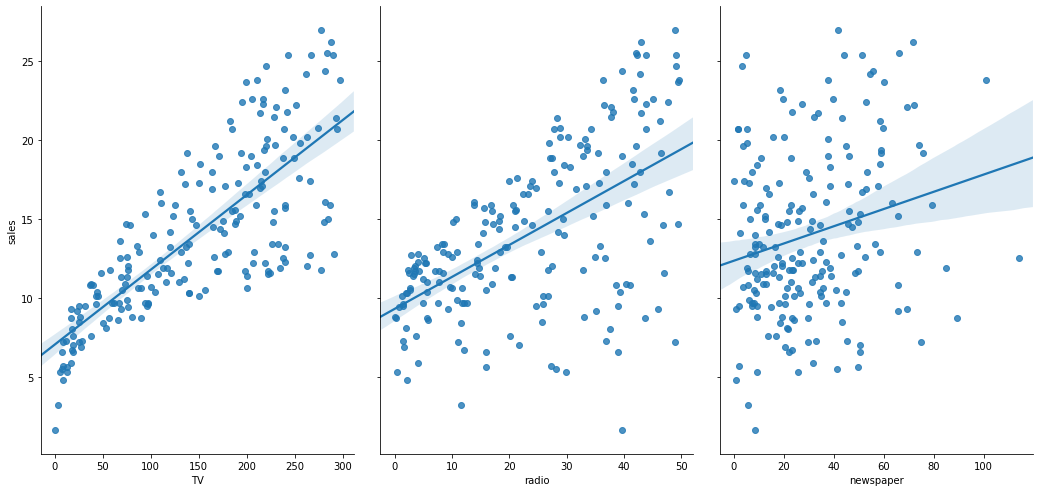

In [20]:
s=sns.pairplot(sales,x_vars=["TV","radio","newspaper"], y_vars="sales",kind="reg",size=7,aspect=0.7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F905757A48>,
      dtype=object)

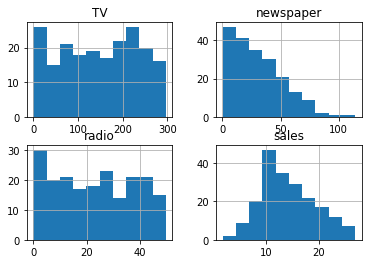

In [21]:
sales.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F905B6AC48>,
      dtype=object)

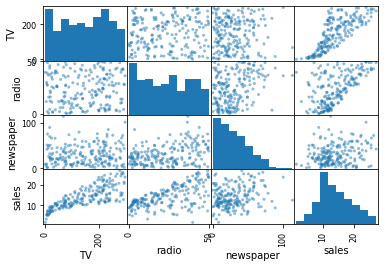

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(sales)

# SPLITTING DATA INTO X AND Y

In [23]:
x=sales.drop("sales",axis=1)
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
y=sales["sales"]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [25]:
x.shape

(200, 3)

In [26]:
y.shape

(200,)

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,'is',max_r_score)

max r2 score corresponding to 13 is 0.9329679186406995


In [28]:
x_train.shape

(150, 3)

In [29]:
y_train.shape

(150,)

In [30]:
x_test.shape

(50, 3)

In [31]:
y_test.shape

(50,)

# CHOOSE MODEL

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [38]:
# Test Options and Evaluation Metrics
num_folds = 10
scoring='r2'
# Spot Check Algorithms
models = []
models.append(('lm', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('dtc', DecisionTreeRegressor()))
models.append(('rfc', RandomForestRegressor()))

results = []
names = []
for name, model in models:
    kfold =KFold(n_splits=num_folds, random_state=13)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold,    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)

lm: 0.860007 (0.084261)
KNN: 0.904576 (0.029107)
dtc: 0.933952 (0.026832)
rfc: 0.969377 (0.014417)


In [34]:
from sklearn.model_selection import GridSearchCV
# Build parameter grid
params= {'max_depth':[10,20,30,40,50],
            'min_samples_split':[2,3,4,7,10],
            'min_samples_leaf' :[1,3,5,10],
            'max_features':['sqrt','log2'],
              }
# Build the model
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds, random_state=13)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.882322 using {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3}
0.840872 (0.100766) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.817570 (0.177723) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3}
0.811308 (0.172682) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4}
0.793811 (0.218946) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7}
0.736090 (0.339313) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
0.814506 (0.188396) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}
0.777872 (0.181921) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3}
0.717039 (0.315245) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_lea

In [35]:
#Make predictions for the best trained model
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(r2_score(y_test,predrfc))
print(mean_squared_error(y_test,predrfc))

0.9751936481766627
0.6203760000000001


In [36]:
sales1=pd.DataFrame({"Actual":y_test,"Predicted":predrfc})
sales1

,Actual,Predicted
135,11.6,12.07
127,8.8,9.07
191,9.9,10.39
66,9.5,8.27
119,6.6,7.21
111,21.8,22.16
81,12.3,12.07
36,25.4,23.88
126,6.6,6.34
187,17.3,18.01


In [37]:
#Save the model
from sklearn.externals import joblib
joblib.dump(rfc,"sales.pkl")

['sales.pkl']